In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium

In [2]:
df = pd.read_excel('./emission.xlsx')
df

,year,SRN,lat,lon,emissions,unit
0,2006,A1177,43.029200,-83.654700,0.1900,LB
1,2006,A1178,43.052212,-83.683090,0.0500,LB
2,2006,A1178,43.052212,-83.683090,0.1300,LB
3,2006,A1178,43.052212,-83.683090,0.0900,LB
4,2006,A1178,43.052212,-83.683090,0.0000,LB
...,...,...,...,...,...,...
411,2015,M3641,43.019029,-83.687453,0.0000,LB
412,2015,N3570,43.085003,-83.670140,0.0014,LB
413,2015,N3570,43.085003,-83.670140,17.1000,LB
414,2015,N6016,42.892172,-83.642243,0.0000,LB


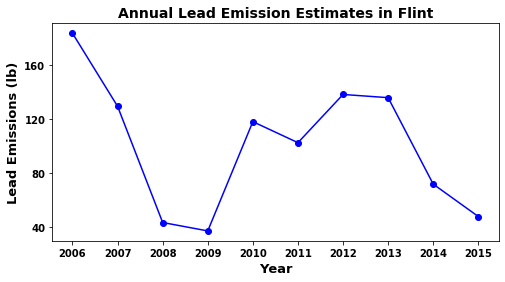

In [37]:
annual = df.groupby(df.year)['emissions'].sum()
plt.figure(figsize=(8, 4))
plt.plot([2006+i for i in range(10)], annual, 'b-o')
plt.title('Annual Lead Emission Estimates in Flint', fontweight='bold', fontsize=14)
plt.xticks(np.arange(2006, 2016), fontweight='bold')
plt.yticks(np.arange(40, 200, 40), fontweight='bold')
plt.xlabel('Year', fontweight='bold', fontsize=13)
plt.ylabel('Lead Emissions (lb)', fontweight='bold', fontsize=13)
plt.savefig('./annual_total_emissions.png')

In [51]:
a = pd.DataFrame(df.groupby([df.year, df.SRN])['emissions'].sum())
a.to_csv('./emission_grouped.csv')

In [3]:
b = pd.read_csv('./emission_grouped.csv')
lat = df.groupby([df.year, df.SRN])['lat'].mean()
lon = df.groupby([df.year, df.SRN])['lon'].mean()
b['lat'] = np.array(lat)
b['lon'] = np.array(lon)
b

,year,SRN,emissions,lat,lon
0,2006,A1177,0.1900,43.029200,-83.654700
1,2006,A1178,0.2700,43.052212,-83.683090
2,2006,B1597,2.9700,42.990404,-83.633535
3,2006,B1598,47.0600,43.036203,-83.772859
4,2006,B1604,0.1000,42.972850,-83.794230
...,...,...,...,...,...
104,2015,B1606,0.3800,42.985234,-83.719779
105,2015,D3598,0.0800,43.067295,-83.844372
106,2015,M3641,0.0400,43.019029,-83.687453
107,2015,N3570,17.1014,43.085003,-83.670140


In [4]:
data = b.loc[b.year == 2006]
data

,year,SRN,emissions,lat,lon
0,2006,A1177,0.19,43.029200,-83.654700
1,2006,A1178,0.27,43.052212,-83.683090
2,2006,B1597,2.97,42.990404,-83.633535
3,2006,B1598,47.06,43.036203,-83.772859
4,2006,B1604,0.10,42.972850,-83.794230
5,2006,B1606,0.00,42.985234,-83.719779
6,2006,B1610,119.00,43.004550,-83.693500
7,2006,B4020,0.11,43.038290,-83.653026
8,2006,B6179,0.03,43.058652,-83.680293
9,2006,M3641,0.04,43.022845,-83.680942


In [49]:
for yl in range(10):
    data = b.loc[b.year == (2006+yl)]
    m = folium.Map(location=[43.016193, -83.705521], zoom_start=10)

    for i in range(len(data)):
        folium.Circle(
          location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
          popup=data.iloc[i]['emissions'],
          radius=data.iloc[i]['emissions']*20,
          color='black',
          fill=True,
          fill_color='cyan'
       ).add_to(m)

    m.save(f'{2006+yl}.html')